# Credit Card Default Prediction

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
import logging
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Logging File

In [2]:
logging.basicConfig(filename='modellog.log', level=logging.INFO,
                   format='%(levelname)s:%(asctime)s:%(message)s')
logger = logging.getLogger(__name__)

## Data Collection

- Credit card default prediction Dataset taken from kaggle link: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

## Loading Credit Card Default Dataset

In [3]:
logger.info("Loading dataset...")
df=pd.read_csv(r"C:\Users\pagad\Downloads\Credit Card Defaulter Prediction Project\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In this dataset 30000 rows and 25 columns there.

## Feature Engineering

In [4]:
logger.info('Analysis of data...')
df.size

750000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.nunique() #check unique values

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
df.columns #check all column names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

## Data Cleaning

In [8]:
logger.info("Data Cleaning...")
df=df.rename(columns={'default.payment.next.month':"Default"}) #rename of target varaiable

In [9]:
df=df.drop(columns={"ID"}, axis=1) # drop id column

In [10]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
df.isnull().sum() #check missing values

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [12]:
df.Default.value_counts()

0    23364
1     6636
Name: Default, dtype: int64

There are Default value counts(1) is 6636 and no default value counts(0) is 23364 

In [13]:
df.describe().T #check statistical measurements

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


- In this dataset  24 columns with 30000 counts which indicates no missing values. Categorical varaiable is taraget varibale as Default column.

- Avgerage of limit balance amount is 167484 and mostly 24 to 41 age peoples using credit cards 

# Explore the data

0    23364
1     6636
Name: Default, dtype: int64


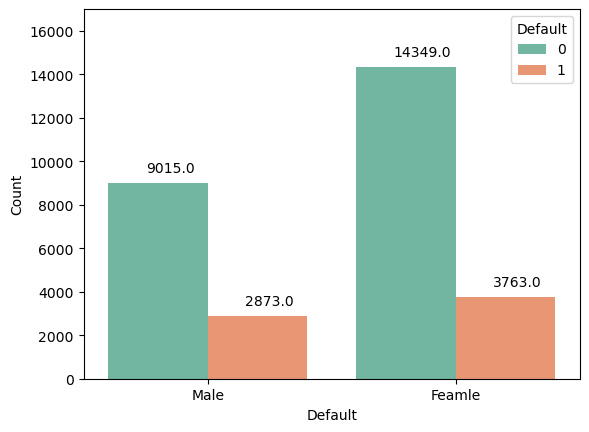

In [14]:
logger.info("Exploring data...")
print(df['Default'].value_counts())
plt.figure(dpi=100)
ax=sns.countplot(data=df,x="SEX",hue="Default" ,palette="Set2")
plt.xlabel("Default")
plt.ylabel("Count")
plt.ylim(0,17000)
plt.xticks([0,1],['Male','Feamle'])
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()

- Observe above barchart females are high

In [15]:
df2=df.copy() #shallow copy

In [16]:
def edu1(x):
    if x==1:
        return "Graduate"
    elif x==2:
        return "University"
    elif x==3:
        return "High school"
    else:
        return "others"
df2['EDUCATION']=df['EDUCATION'].apply(edu1)

In [17]:
print(df2['EDUCATION'].value_counts())

University     14030
Graduate       10585
High school     4917
others           468
Name: EDUCATION, dtype: int64


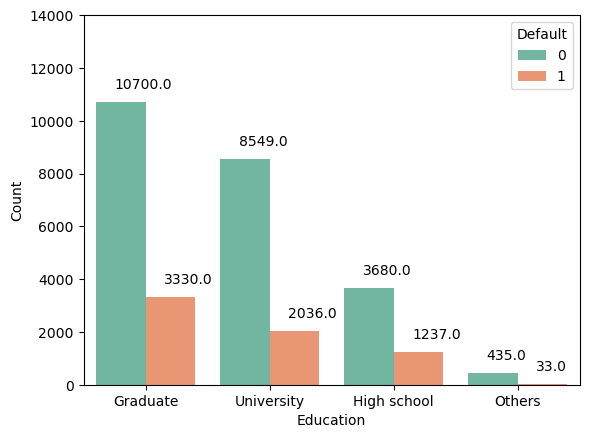

In [18]:
plt.figure(dpi=100)
ax=sns.countplot(data=df2,x='EDUCATION',hue='Default',palette="Set2")
plt.xlabel("Education")
plt.ylabel("Count")
plt.ylim(0,14000)
plt.xticks([0,1,2,3],['Graduate','University','High school','Others'])
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()

- Graduates and University persons are high

In [19]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
def mar(x):
    if x==1:
        return "Married"
    elif x==2:
        return "Single"
    else:
        return "Other"
df2['MARRIAGE']=df['MARRIAGE'].apply(mar)

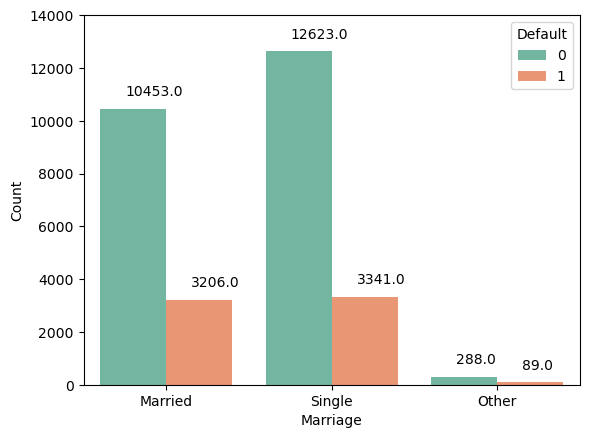

In [21]:
plt.figure(dpi=100)
ax=sns.countplot(data=df2,x='MARRIAGE',hue='Default',palette="Set2")
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.ylim(0,14000)
plt.xticks([0,1,2],['Married','Single','Other'])
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()

- Singles are mostly high

In [22]:
bins=[20,30,40,50,60,70,80]
ages=['21-30','31-40','41=50','51-60','61-70','71-80']
df['Age_rang']=pd.cut(x=df.AGE,bins=bins,labels=ages, right=True)

In [23]:
df['Age_rang'].value_counts()

21-30    11013
31-40    10713
41=50     6005
51-60     1997
61-70      257
71-80       15
Name: Age_rang, dtype: int64

In [24]:
age_no_default=df.Age_rang[df["Default"]==0].value_counts()
age_default=df.Age_rang[df['Default']==1].value_counts()
print(age_default)
print(age_no_default)

21-30    2471
31-40    2189
41=50    1399
51-60     504
61-70      68
71-80       5
Name: Age_rang, dtype: int64
21-30    8542
31-40    8524
41=50    4606
51-60    1493
61-70     189
71-80      10
Name: Age_rang, dtype: int64


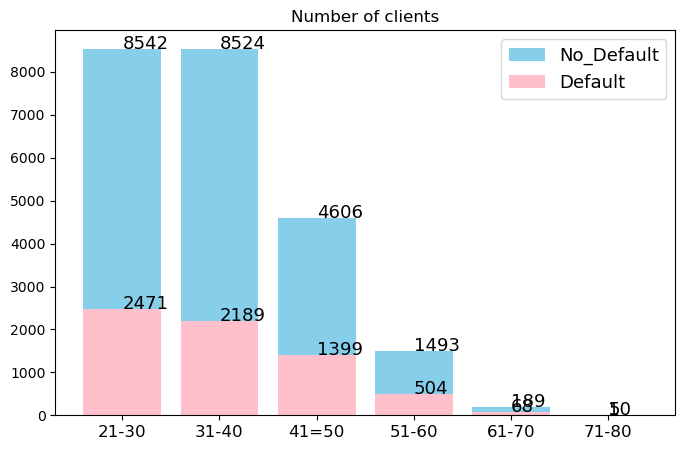

In [25]:
plt.subplots(figsize=(8,5))
plt.bar(age_no_default.index,age_no_default.values,label="No_Default",color='skyblue')
plt.bar(age_default.index,age_default.values,label="Default",color="pink")
for x,y in zip(ages,age_no_default):
    plt.text(x,y,y,fontsize=13)
for x,y in zip(ages,age_default):
    plt.text(x,y,y,fontsize=13)
    
plt.xticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Number of clients",fontsize=12)
plt.legend(loc='upper right',fontsize=13)
plt.show()

- Mostly 21 to 40 age people are high

In [26]:
def limit(x):
    if x<100000:
        return "less than 100K"
    elif x in range(100000,200000):
        return "100K"
    elif x in range(200000,300000):
        return "200K"
    elif x in range(300000,400000):
        return "300K"
    elif x in range(400000,500000):
        return "400K"
    elif x in range(500000,600000):
        return "500K"
    elif x in range(600000,700000):
        return "600K"
    elif x in range(700000,800000):
        return "700K"
    elif x in range(800000,900000):
        return "800K"
    elif x in range(900000,1000000):
        return "900K"
    else:
        return "greater than 1M"

In [27]:
df2['LIMIT_BAL']=df2['LIMIT_BAL'].apply(lambda x: limit(x))

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='count'>

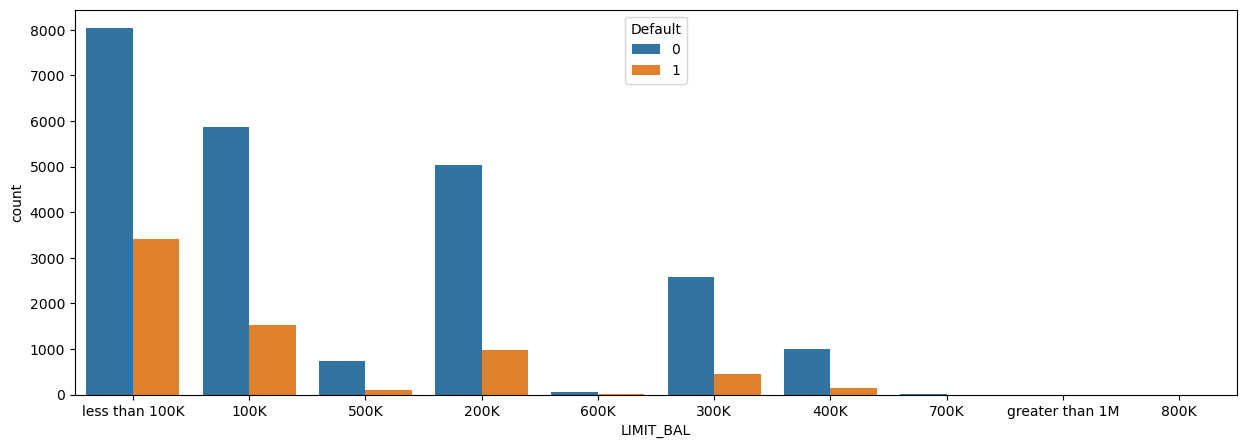

In [28]:
plt.figure(figsize=[15,5])
sns.countplot(data=df2,x='LIMIT_BAL',hue='Default')

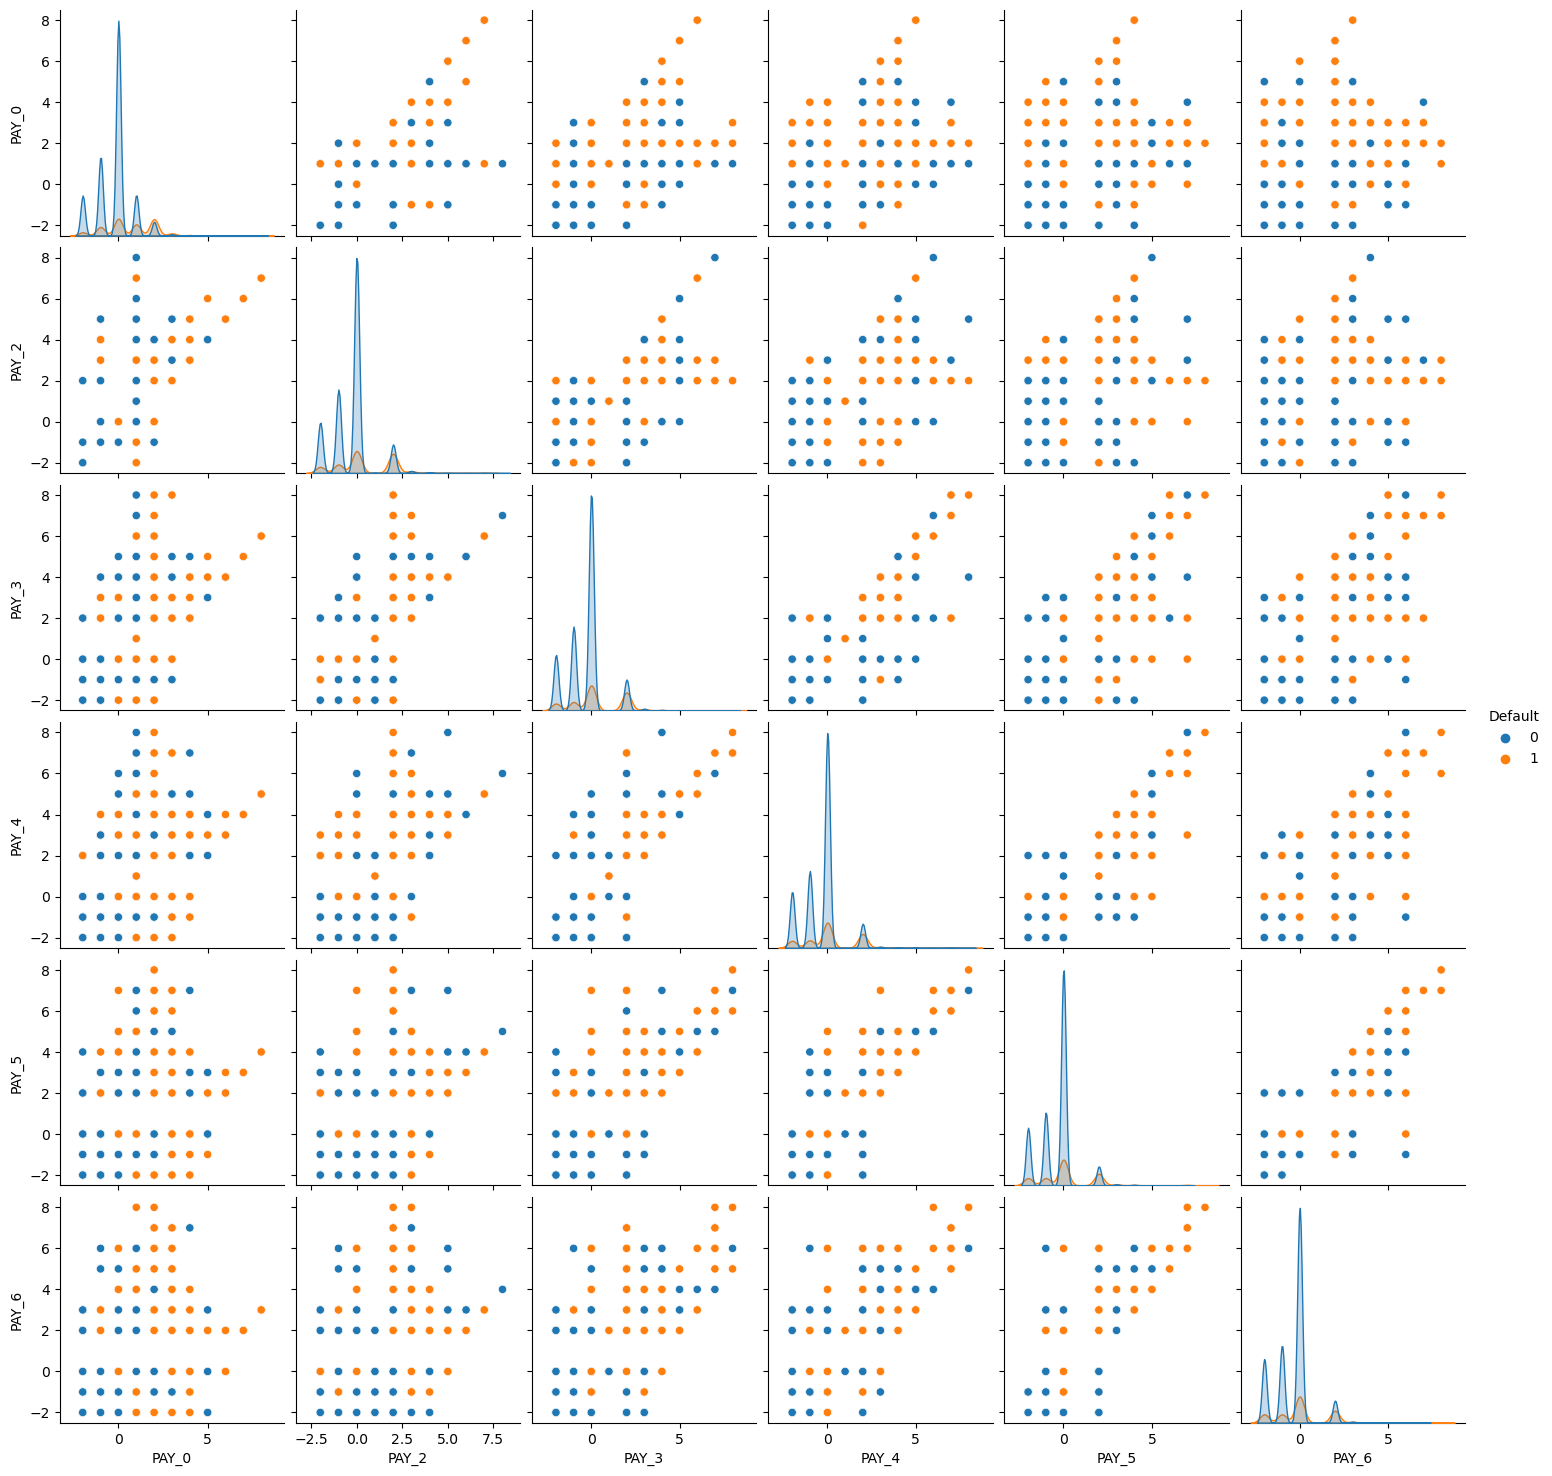

In [29]:
sns.pairplot(df, vars=df.columns[5:11], kind='scatter',hue= 'Default')

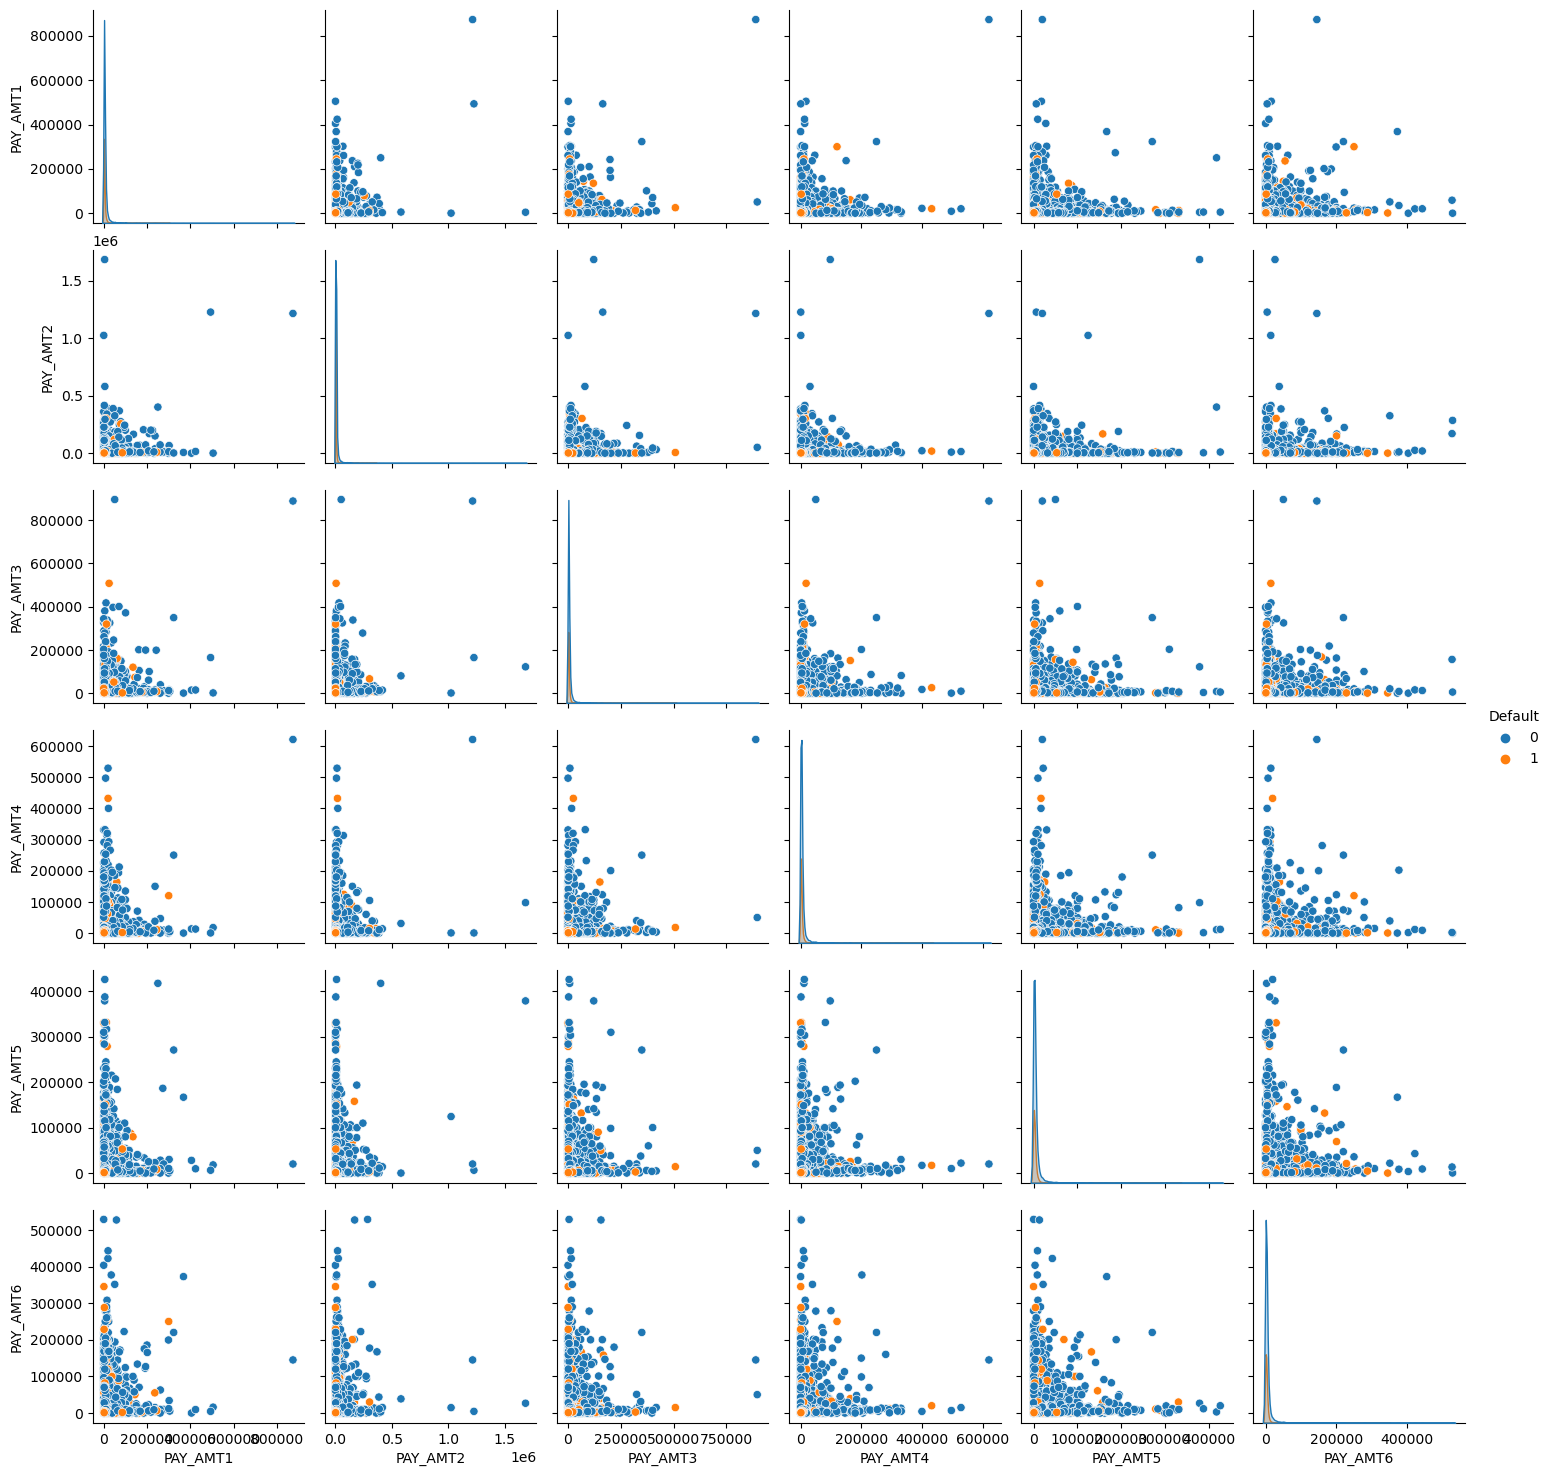

In [30]:
sns.pairplot(df, vars=df.columns[17:23], kind='scatter',hue= 'Default')

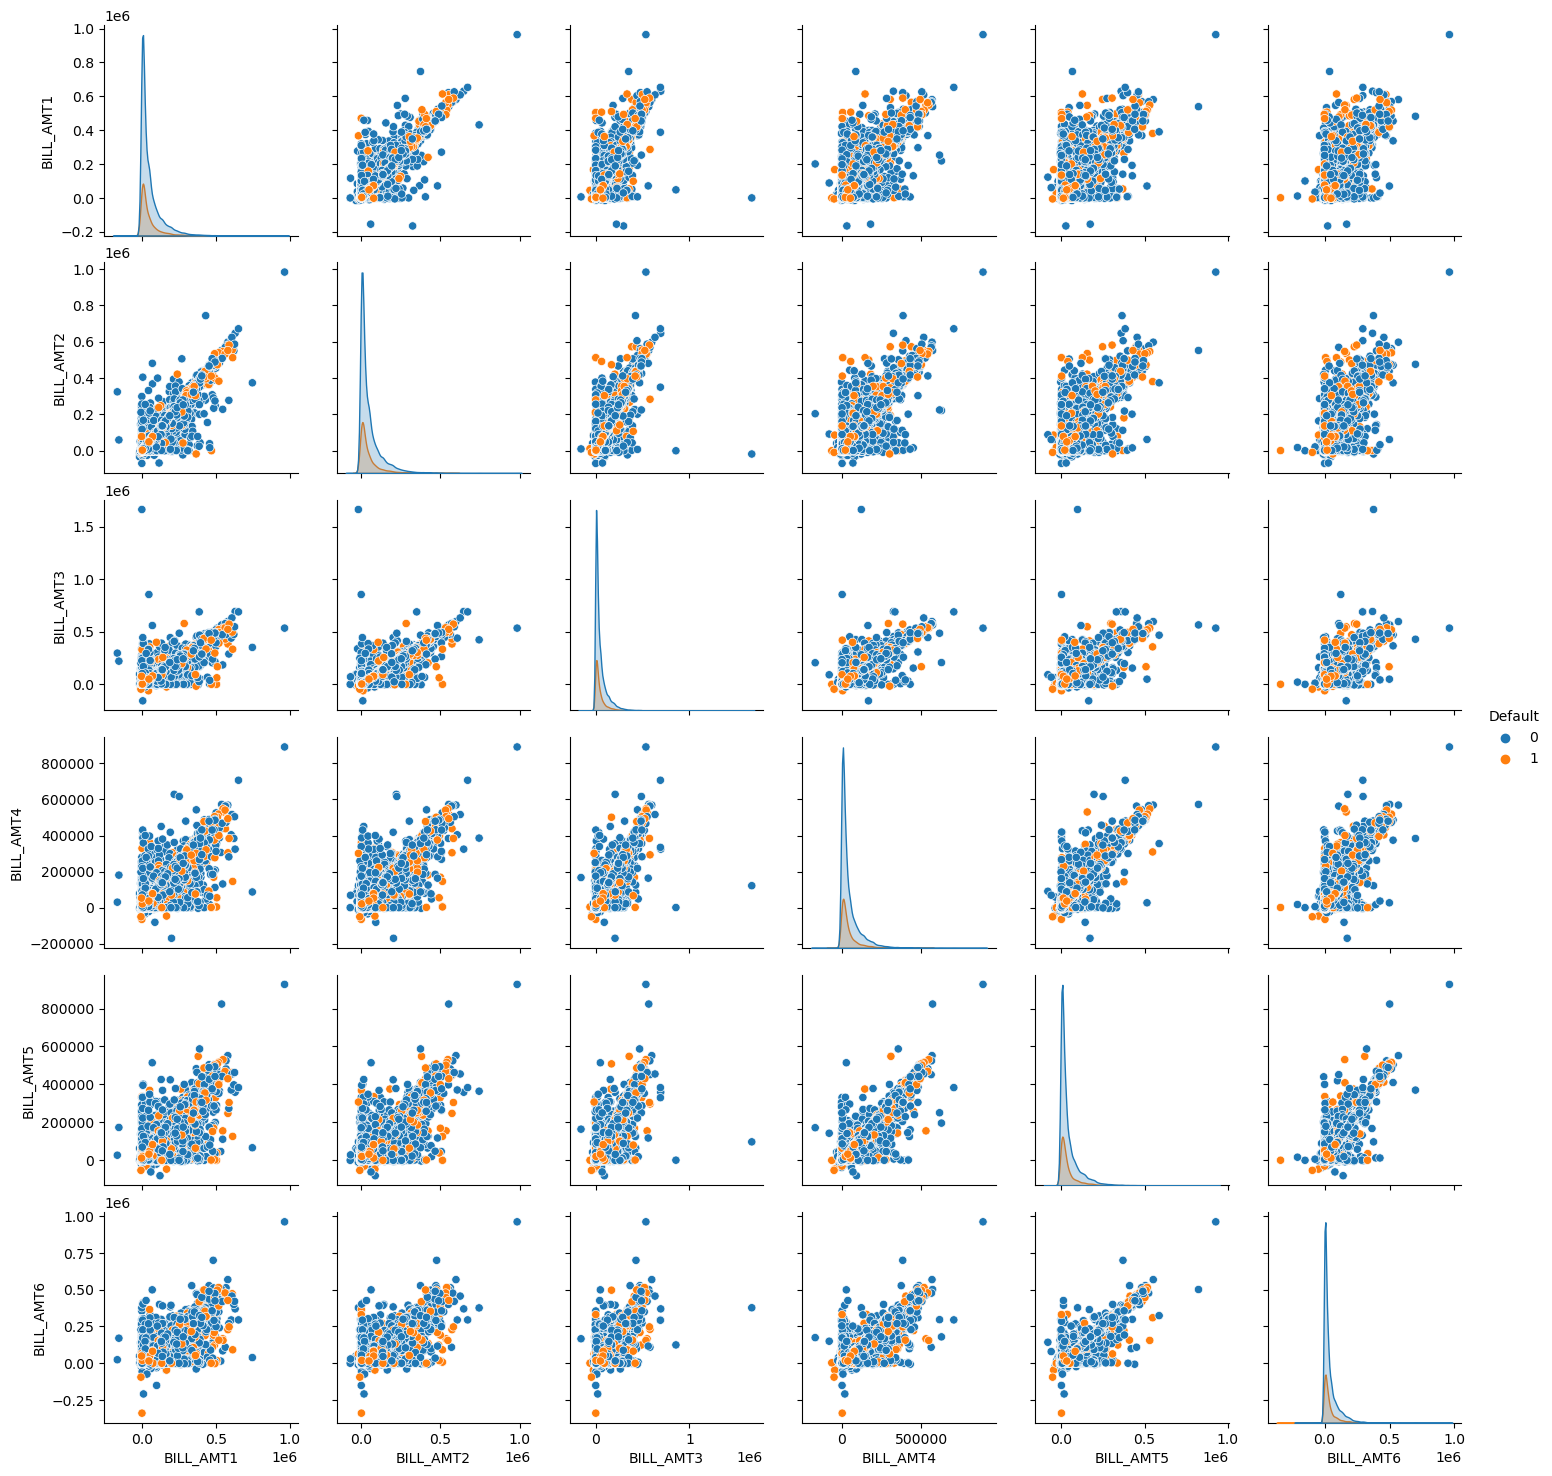

In [31]:
sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'Default')

# Imbalanced Data set

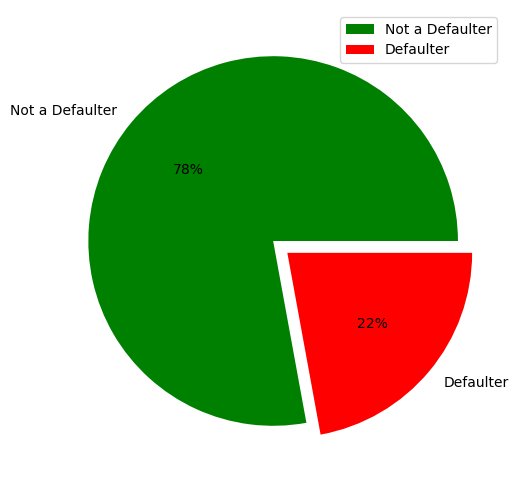

In [32]:
logger.info('Imbalanced data set...')
plt.figure(figsize = (15,6))
palette_color = sns.color_palette('rocket',as_cmap=True)
keys=['Not a Defaulter','Defaulter']
plt.pie(df["Default"].value_counts(), labels=keys, autopct='%.0f%%',colors = ["green", "red"],explode = [0,0.1])
plt.legend()
plt.show()

- Not a Default percentage is high (78%) and Default percentage is low (22%)

# Split the data

In [33]:
logger.info("Split the data...")
df1=df.copy()

In [34]:
x=df1.drop(['Default',"Age_rang"], axis=1) # splitting the data 
y=df1['Default']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100, test_size=0.25)
x_train.to_csv("traindata.csv")
x_test.to_csv("testdata.csv")

- Total dataset to 75% data using training and 25% data using testing.

## Scaling the data

In [36]:
logger.info("Scaling the data..")
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(x_train)
xtest=scaler.transform(x_test)

# Model Evaluation

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logger.info("Starts logistic regression model...")
lr=LogisticRegression()
model_lr=lr.fit(xtrain,y_train)
y_pred_lr=model_lr.predict(xtest)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred_lr)*100
print('Logistic Regression model accuracy is : ',accuracy_score)

Logistic Regression model accuracy is :  80.42666666666666


Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.98      0.88      5776
           1       0.74      0.23      0.35      1724

    accuracy                           0.80      7500
   macro avg       0.77      0.60      0.62      7500
weighted avg       0.79      0.80      0.76      7500



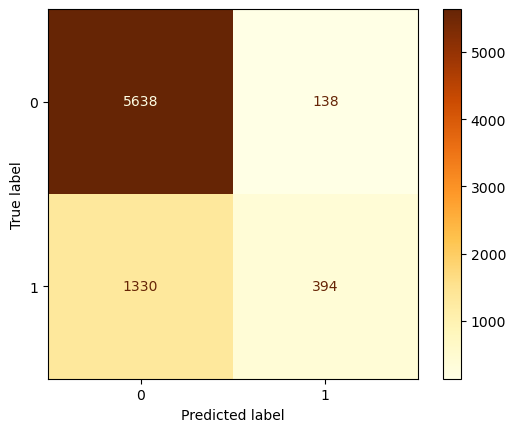

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
treeconn=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(treeconn)
disp.plot(cmap='YlOrBr')

from sklearn.metrics import classification_report
print("Classification report: \n",classification_report(y_test,y_pred_lr))

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',max_depth=9, max_features=6, n_estimators=200)
logger.info("Starts Random Forest Model...")
model_rf=rf.fit(xtrain,y_train)
rf_predict=model_rf.predict(xtest)


In [42]:
from sklearn.metrics import accuracy_score
train_rf_predict=rf.predict(xtrain)
print("Random Forest model Test accuracy is:",accuracy_score(y_test,rf_predict)*100)
print('Random Forest model Train accuracy is:',accuracy_score(y_train,train_rf_predict)*100)

Random Forest model Test accuracy is: 82.08
Random Forest model Train accuracy is: 84.49333333333333


In [43]:
y_pred=model_rf.predict(x_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5776
           1       0.71      0.37      0.49      1724

    accuracy                           0.82      7500
   macro avg       0.77      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500



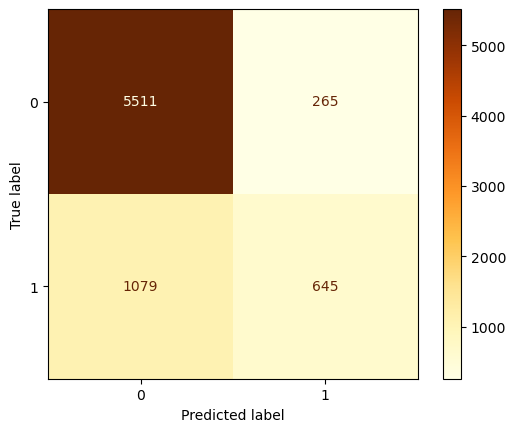

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
treecon=confusion_matrix(y_test,rf_predict)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot(cmap='YlOrBr')

from sklearn.metrics import classification_report
print("Classification report: \n",classification_report(y_test,rf_predict))

# SVM

In [45]:
from sklearn.svm import SVC
logger.info("Starts SVM model...")
svc=SVC()
svc=svc.fit(xtrain,y_train)
sv_predict=svc.predict(xtest)

In [46]:
print('svc accuracy score',accuracy_score(y_test,sv_predict)*100)

svc accuracy score 81.86666666666666


Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5776
           1       0.72      0.35      0.47      1724

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.68      7500
weighted avg       0.81      0.82      0.79      7500



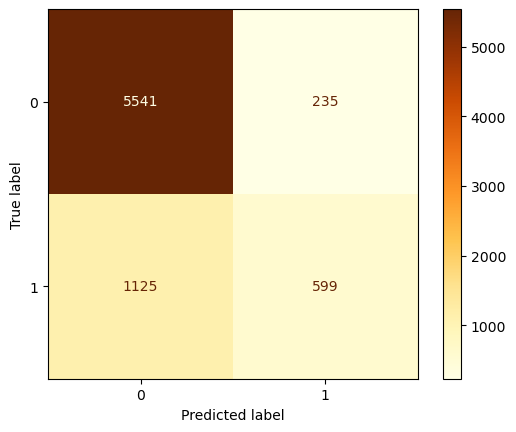

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
treeconn=confusion_matrix(y_test,sv_predict)
treeDisplay=ConfusionMatrixDisplay(treeconn)
treeDisplay.plot(cmap='YlOrBr')

from sklearn.metrics import classification_report
print("Classification report: \n",classification_report(y_test,sv_predict))

- Finally Random Forest model accuracy is 82.08% so this is the best model.
- Then saving Best model pickling file

## Pickling best model

In [48]:
logger.info("Saving Best model..")
file=open('randomforestclassifiermodel.pkl','wb')
pickle.dump(model_rf,file)